# Author : Jainish Shah

## Task 1: Prediction Using Supervised Machine Learning

## GRIP @ The Spark Foundation

In this regression task I tried to predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

This is a simple linear regression task as it involves just two variables.  

### Step 0: Importing the libraries

In [2]:
# Importing all the libraries that are required for the task

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

### Step 1 - Reading the Dataset

In [3]:
# Reading the dataset from the remote link provided

link = "http://bit.ly/w-data"
data = pd.read_csv(link)
print("Data import successfully...")

data.head()

Data import successfully...


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Step 2 - Visualization of the Imported Data

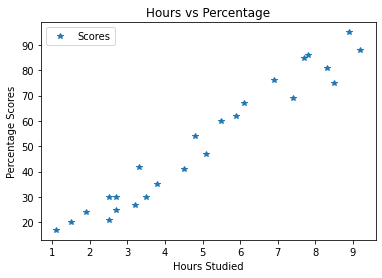

In [5]:
# Plotting the distribution of scores

data.plot(x='Hours',y='Scores',style='*')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scores')
plt.show()



From the graph we can safely assume a positive linear relation between the number of hours studied and percentage of score.


### Step 3-Data Preprocessing

This step involves the division of the dataset into attributes(inputs) and labels(outputs)


In [18]:
X = data.iloc[:,:-1].values    # we can directly take the data as 0 but then we have to perform reshaping
y = data.iloc[:,1].values

### Step 4 - Model Training

Here we will split the dataset into training and testing datasets. And then train the algorithm.



In [20]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
regressor = LinearRegression()
regressor.fit(X_train.reshape(-1,1),y_train)

print("Training Completed...")

Training Completed...


### Step 5 - Plotting the Line of Regression
Now Since our model is trained, now we can visualize the best-fit line of regression.

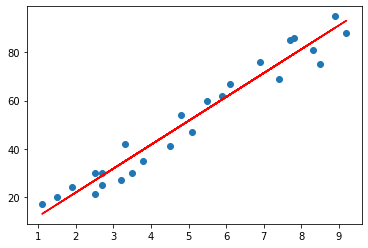

In [21]:
# Plotting the regression Line

line = regressor.coef_*X+regressor.intercept_

# Plotting the test data
plt.scatter(X,y)
plt.plot(X,line, color ="red")
plt.show()

### Step 6 - Making Predictions
Now that we have trained our algorithm, it's time to test the model by making some predictions.

For this we will use our test-set data

In [22]:
# Testing the dataset
print(X_test)
# Model Prediction
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### Step 7 - Comparing Actual result to the Predicted Model result

In [23]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [24]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9515510725211553
Test Score: 0.9454906892105354


In [25]:
import plotly.express as px
fig = px.scatter(df, x="Actual", y="Predicted")
fig.show()

In [31]:
# Testing the model
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


### Step 8 - Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. Here different errors have been calculated to compare the model performance and predict the accuracy.


In [32]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373
R-2: 0.9454906892105354


So from the above results it is clear that R-2 is having the score of model fit as 0.94